<a href="https://colab.research.google.com/github/Allin-13/MachineLearning/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train (1).csv


/tmp/ipython-input-3023802287.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)



Enter passenger details:
Pclass (1/2/3): 1
Sex (0=male, 1=female): 1
Age: 19
Siblings/Spouse: 1
Parents/Children: 2
Fare: 100

 RESULT: PASSENGER SURVIVED 

Prediction Probabilities:
Did Not Survive: 12.00%
Survived: 88.00%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


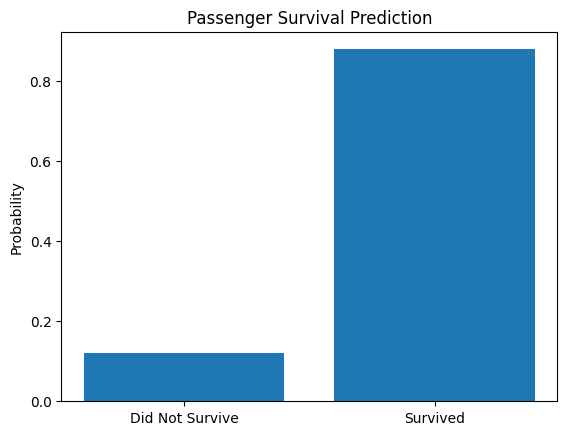

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Step 1: Load dataset
data = pd.read_csv("train.csv")

# Step 2: Select useful features
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

# Step 3: Handle missing values
data['Age'].fillna(data['Age'].mean(), inplace=True)

# Convert gender to numeric
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Step 4: Split features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: Create and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -------------------------------
# Step 7: Take user input
# -------------------------------
print("\nEnter passenger details:")

pclass = int(input("Pclass (1/2/3): "))
sex = int(input("Sex (0=male, 1=female): "))
age = float(input("Age: "))
sibsp = int(input("Siblings/Spouse: "))
parch = int(input("Parents/Children: "))
fare = float(input("Fare: "))

new_passenger = [[pclass, sex, age, sibsp, parch, fare]]

# -------------------------------
# Step 8: Prediction
# -------------------------------
prediction = model.predict(new_passenger)
prob = model.predict_proba(new_passenger)[0]

# Display result
print("\n==============================")
if prediction[0] == 1:
    print(" RESULT: PASSENGER SURVIVED ")
else:
    print(" RESULT: PASSENGER DID NOT SURVIVE ")
print("==============================")

# Display probabilities
print("\nPrediction Probabilities:")
print(f"Did Not Survive: {prob[0]*100:.2f}%")
print(f"Survived: {prob[1]*100:.2f}%")

# -------------------------------
# Step 9: Graph visualization
# -------------------------------
labels = ["Did Not Survive", "Survived"]
values = [prob[0], prob[1]]

plt.figure()
plt.bar(labels, values)
plt.ylabel("Probability")
plt.title("Passenger Survival Prediction")
plt.show()